<a href="https://colab.research.google.com/github/VamsiKrishna-05/Banky/blob/main/PROJECT_Review_1_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SAMPLE PROJECT-1

In [1]:
!pip install ultralytics opencv-python-headless matplotlib pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
dataset_path = '/content/drive/MyDrive/DATASET - PROJECT1'


In [6]:
import os
import cv2
import numpy as np
import pandas as pd

def gather_dataset_statistics(base_path):
    stats = {
        'total_folders': 0,
        'total_images': 0,
        'image_formats': {},
        'image_sizes': [],
        'people_count_per_image': [],
        'folder_image_counts': {},
    }

    # List all subfolders
    folders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]
    stats['total_folders'] = len(folders)

    for folder in folders:
        folder_path = os.path.join(base_path, folder)
        image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        stats['folder_image_counts'][folder] = len(image_files)
        stats['total_images'] += len(image_files)

        for img_file in image_files:
            ext = img_file.split('.')[-1].lower()
            stats['image_formats'][ext] = stats['image_formats'].get(ext, 0) + 1

            # Read the image to get size
            img_path = os.path.join(folder_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                h, w = img.shape[:2]
                stats['image_sizes'].append((h, w))
            else:
                print(f"Warning: Could not read image {img_path}")

    # Convert sizes to numpy array for stats
    if stats['image_sizes']:
        sizes_array = np.array(stats['image_sizes'])
        height_stats = {
            'min_height': int(np.min(sizes_array[:,0])),
            'max_height': int(np.max(sizes_array[:,0])),
            'mean_height': float(np.mean(sizes_array[:,0])),
            'median_height': float(np.median(sizes_array[:,0]))
        }
        width_stats = {
            'min_width': int(np.min(sizes_array[:,1])),
            'max_width': int(np.max(sizes_array[:,1])),
            'mean_width': float(np.mean(sizes_array[:,1])),
            'median_width': float(np.median(sizes_array[:,1]))
        }
    else:
        height_stats = {}
        width_stats = {}

    print("Dataset Folder Statistics:")
    print(f"Total folders: {stats['total_folders']}")
    print(f"Total images: {stats['total_images']}")
    print("\nImage format distribution:")
    for fmt, count in stats['image_formats'].items():
        print(f"  {fmt}: {count} files")
    print("\nImage size statistics (Height x Width in pixels):")
    if height_stats and width_stats:
        for key, value in height_stats.items():
            print(f"  {key}: {value}")
        for key, value in width_stats.items():
            print(f"  {key}: {value}")
    else:
        print("  No valid images found for size statistics.")

    print("\nImages per folder:")
    for folder, count in stats['folder_image_counts'].items():
        print(f"  {folder}: {count} images")

    return stats

# ---------- USAGE ----------
# Set your dataset path here (pointing to your Drive folder)
dataset_path = '/content/drive/MyDrive/DATASET - PROJECT1'  # Change this!

stats = gather_dataset_statistics(dataset_path)


Dataset Folder Statistics:
Total folders: 7
Total images: 2531

Image format distribution:
  jpg: 2531 files

Image size statistics (Height x Width in pixels):
  min_height: 480
  max_height: 480
  mean_height: 480.0
  median_height: 480.0
  min_width: 640
  max_width: 640
  mean_width: 640.0
  median_width: 640.0

Images per folder:
  using_mobile: 26 images
  punching: 30 images
  rgb-5: 585 images
  rgb-1: 145 images
  rgb-2: 575 images
  rgb-4: 585 images
  rgb-3: 585 images


In [9]:
from collections import Counter

def gather_people_count_stats(base_path):
    people_counts = []
    folders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]

    for folder in folders:
        folder_path = os.path.join(base_path, folder)
        image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        for img_file in image_files:
            img_path = os.path.join(folder_path, img_file)
            count = count_people_in_image(img_path)
            people_counts.append(count)

    total_images = len(people_counts)
    count_distribution = Counter(people_counts)

    print(f"Total images processed: {total_images}\n")
    print("People count distribution:")
    for count in sorted(count_distribution.keys()):
        freq = count_distribution[count]
        percentage = (freq / total_images) * 100
        print(f"  {count} people: {freq} images ({percentage:.2f}%)")

# Run this after your previous detection code, using the same dataset_path
gather_people_count_stats(dataset_path)


Streaming output truncated to the last 5000 lines.
Speed: 4.2ms preprocess, 166.5ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 1 airplane, 1 cell phone, 167.4ms
Speed: 5.5ms preprocess, 167.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 1 cell phone, 165.2ms
Speed: 2.7ms preprocess, 165.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 1 cell phone, 165.9ms
Speed: 3.1ms preprocess, 165.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 1 cell phone, 178.6ms
Speed: 4.4ms preprocess, 178.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 persons, 1 cell phone, 165.3ms
Speed: 3.2ms preprocess, 165.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 1 cell phone, 167.8ms
Speed: 4.6ms preprocess, 167.8ms inference, 1.7ms postprocess per image at shap

Folder: using_mobile

0: 480x640 2 persons, 200.7ms
Speed: 2.7ms preprocess, 200.7ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)
Total persons detected: 2


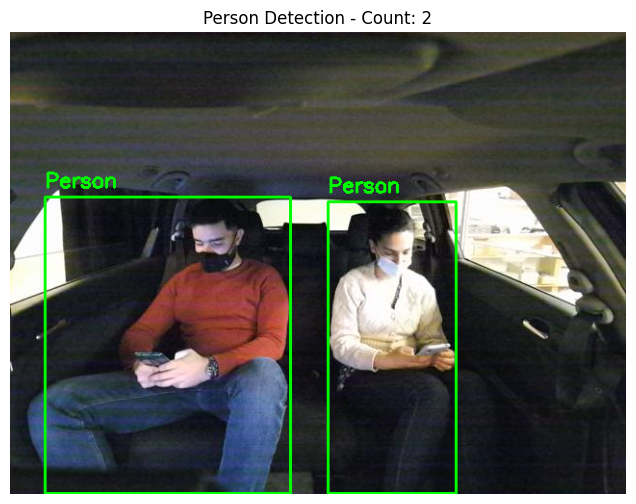


0: 480x640 2 persons, 1 cell phone, 167.8ms
Speed: 4.9ms preprocess, 167.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Total persons detected: 2


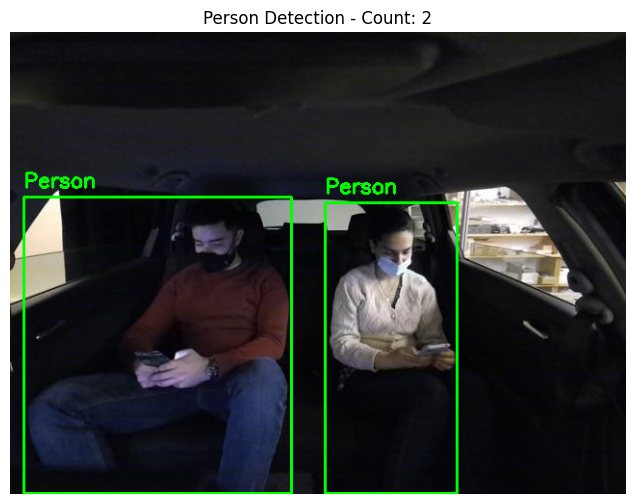


0: 480x640 2 persons, 1 cell phone, 192.7ms
Speed: 2.4ms preprocess, 192.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Total persons detected: 2


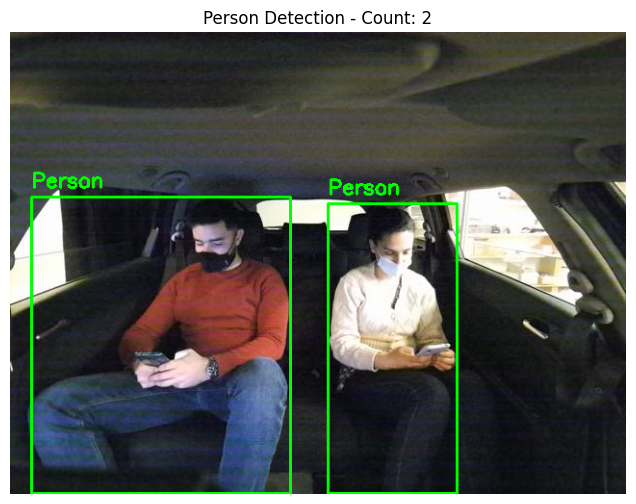


0: 480x640 2 persons, 1 cell phone, 210.3ms
Speed: 4.1ms preprocess, 210.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Total persons detected: 2


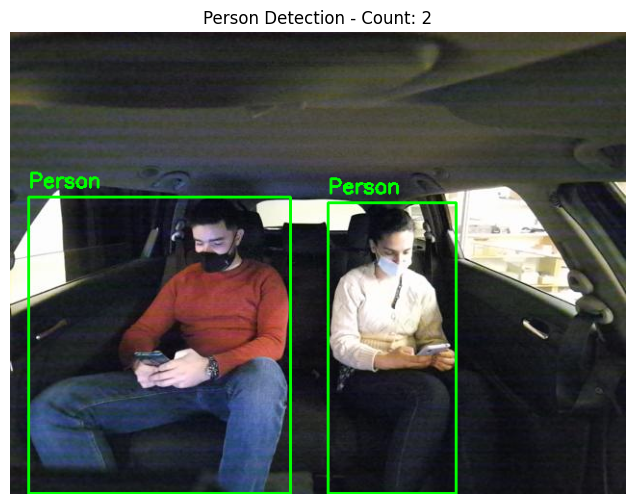


0: 480x640 4 persons, 207.6ms
Speed: 2.6ms preprocess, 207.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Total persons detected: 2


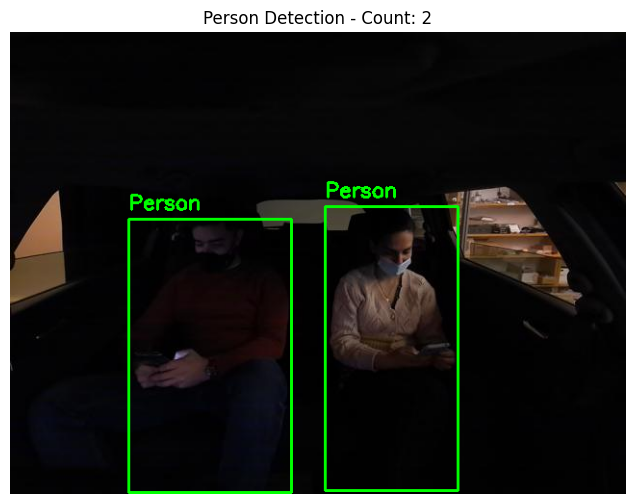


0: 480x640 2 persons, 1 cell phone, 197.7ms
Speed: 3.5ms preprocess, 197.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)
Total persons detected: 2


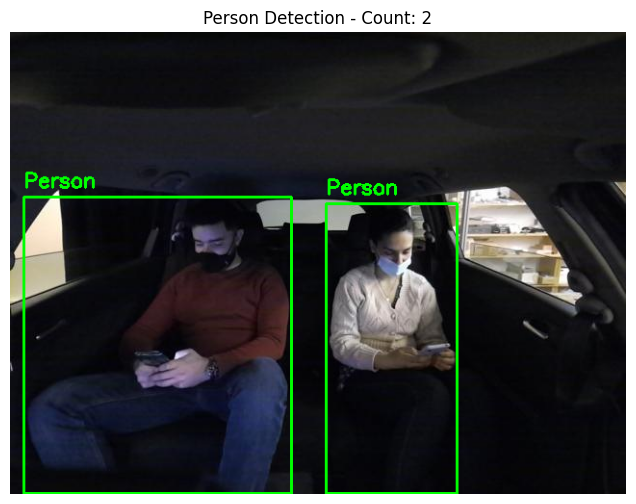


0: 480x640 3 persons, 259.1ms
Speed: 3.0ms preprocess, 259.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Total persons detected: 2


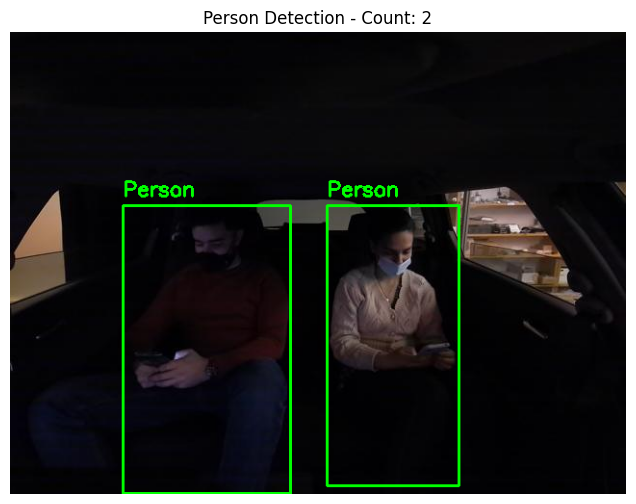


0: 480x640 3 persons, 272.5ms
Speed: 2.6ms preprocess, 272.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Total persons detected: 2


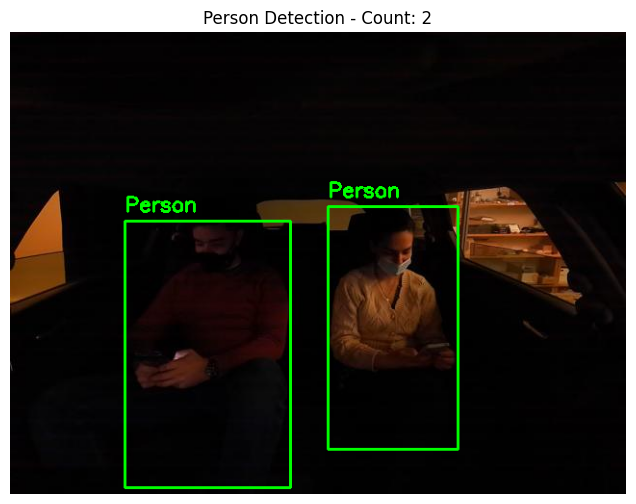


0: 480x640 3 persons, 249.8ms
Speed: 2.7ms preprocess, 249.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
Total persons detected: 2


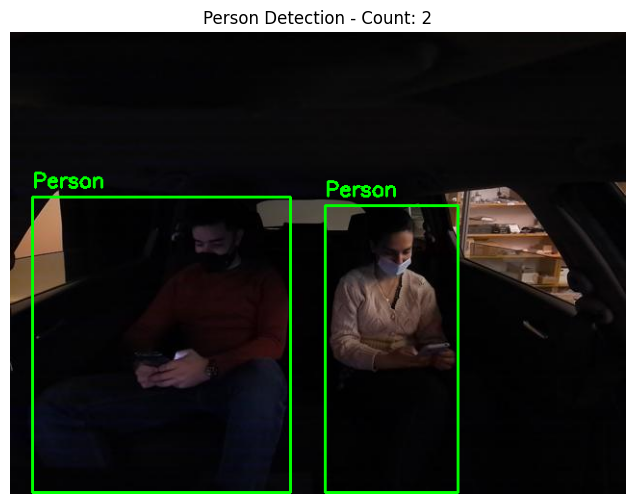


0: 480x640 2 persons, 276.5ms
Speed: 2.9ms preprocess, 276.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Total persons detected: 2


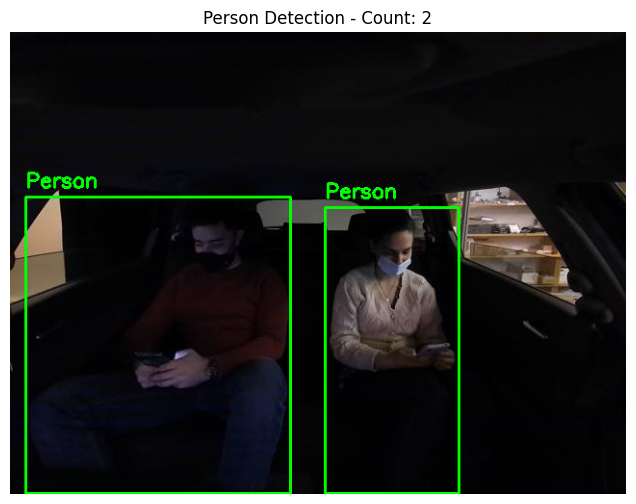


0: 480x640 2 persons, 1 cell phone, 274.8ms
Speed: 2.7ms preprocess, 274.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
Total persons detected: 2


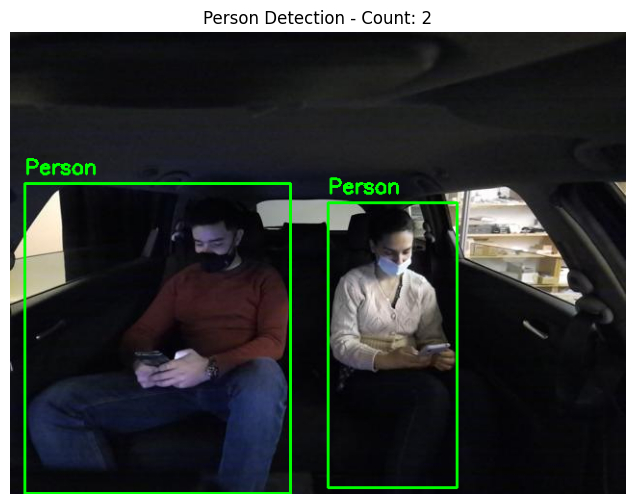


0: 480x640 2 persons, 279.6ms
Speed: 2.8ms preprocess, 279.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Total persons detected: 2


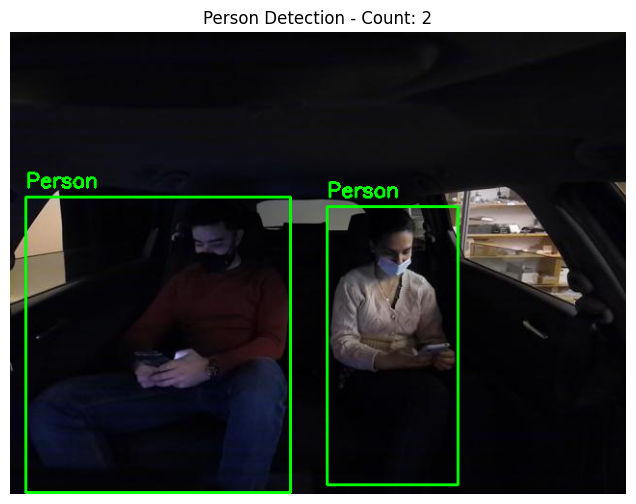


0: 480x640 2 persons, 1 cell phone, 262.2ms
Speed: 2.9ms preprocess, 262.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
Total persons detected: 2


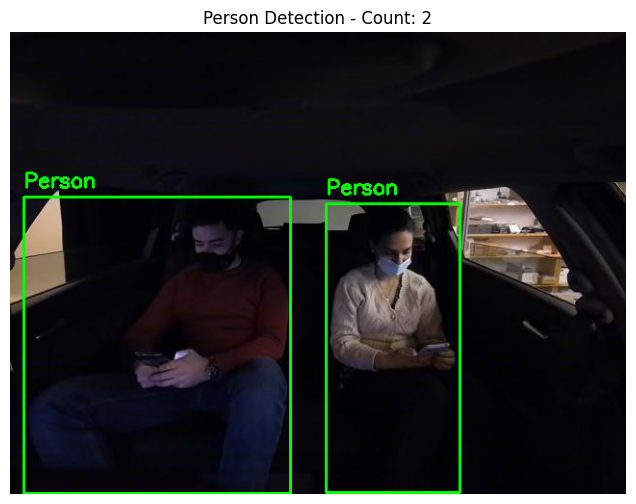


0: 480x640 2 persons, 278.3ms
Speed: 3.1ms preprocess, 278.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
Total persons detected: 2


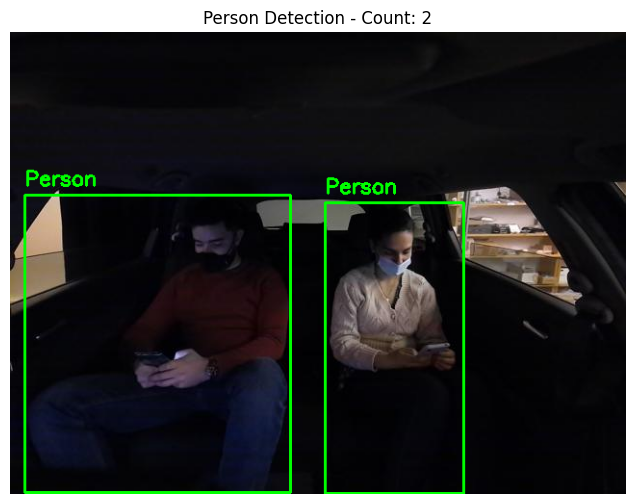


0: 480x640 2 persons, 1 cell phone, 247.3ms
Speed: 2.5ms preprocess, 247.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Total persons detected: 2


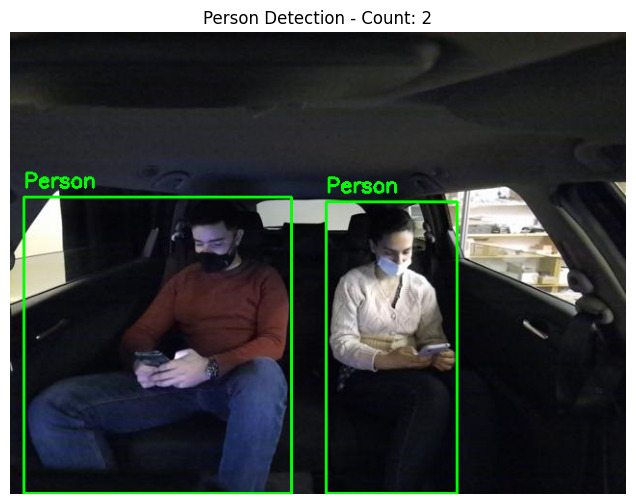


0: 480x640 2 persons, 2 cell phones, 281.3ms
Speed: 2.8ms preprocess, 281.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
Total persons detected: 2


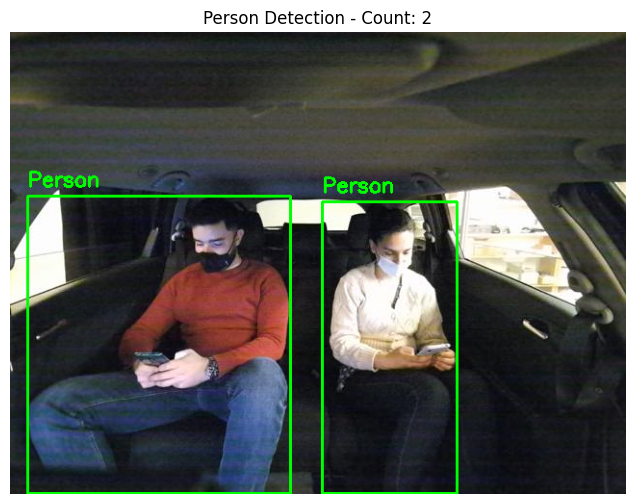


0: 480x640 3 persons, 281.7ms
Speed: 2.8ms preprocess, 281.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Total persons detected: 2


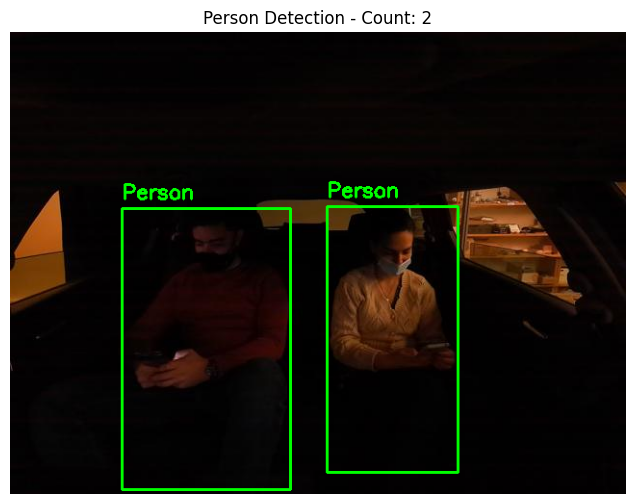


0: 480x640 2 persons, 322.8ms
Speed: 2.8ms preprocess, 322.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
Total persons detected: 2


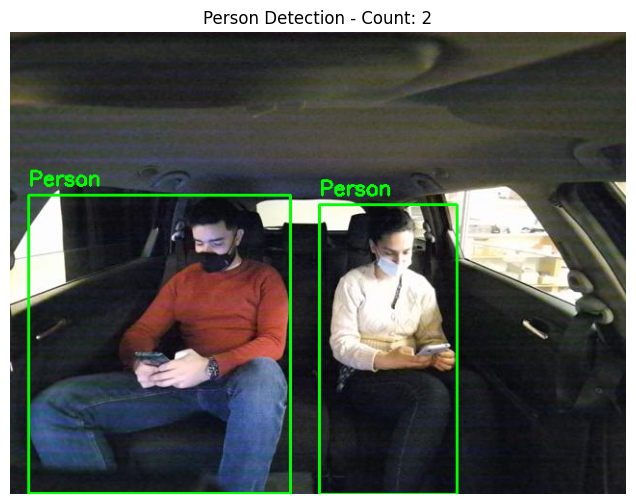


0: 480x640 2 persons, 281.6ms
Speed: 2.7ms preprocess, 281.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Total persons detected: 2


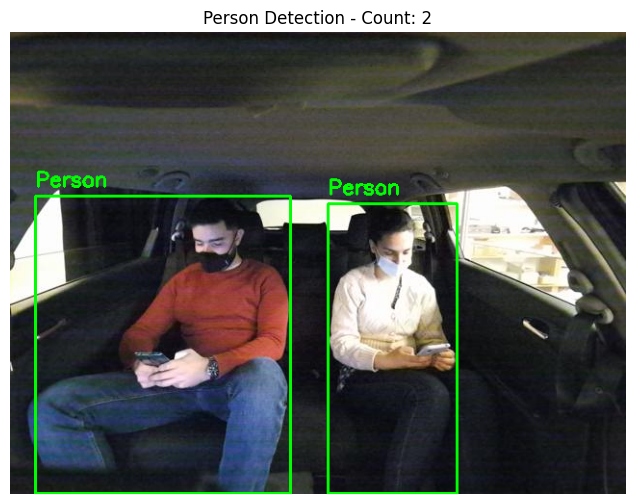


0: 480x640 2 persons, 2 cell phones, 233.7ms
Speed: 3.1ms preprocess, 233.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Total persons detected: 2


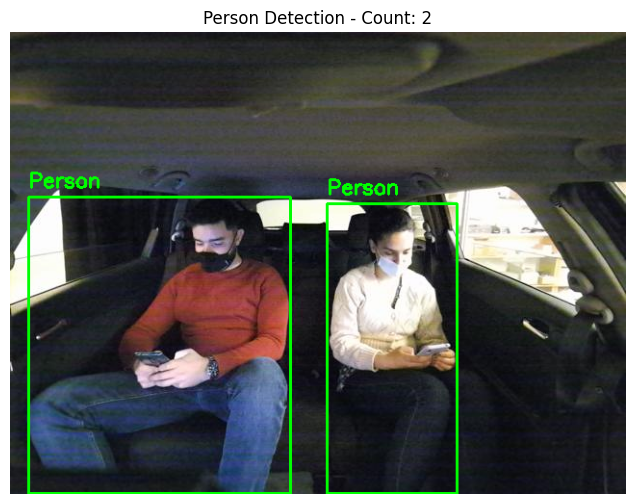


0: 480x640 2 persons, 1 cell phone, 236.7ms
Speed: 2.7ms preprocess, 236.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
Total persons detected: 2


KeyboardInterrupt: 

In [22]:
import os
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load YOLOv8 nano model (pretrained on COCO)
model = YOLO('yolov8n.pt')

def detect_and_count_people(image_path, confidence_threshold=0.5):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read image {image_path}")
        return 0, None

    results = model(image)
    person_count = 0
    annotated_image = image.copy()

    for r in results:
        boxes = r.boxes
        if boxes is not None:
            for box in boxes:
                if int(box.cls) == 0 and float(box.conf) >= confidence_threshold:
                    person_count += 1
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    # Draw bounding box
                    cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    # Put label
                    label = f'Person'
                    cv2.putText(annotated_image, label, (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    print(f"Total persons detected: {person_count}")

    # Convert BGR to RGB for displaying with matplotlib
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(annotated_image_rgb)
    plt.title(f'Person Detection - Count: {person_count}')
    plt.axis('off')
    plt.show()

    return person_count, annotated_image

def process_folder_for_people(base_path, confidence_threshold=0.5):
    folders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]
    for folder in folders:
        folder_path = os.path.join(base_path, folder)
        image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        print(f"Folder: {folder}")
        for image_file in image_files:
            img_path = os.path.join(folder_path, image_file)
            count, _ = detect_and_count_people(img_path, confidence_threshold)

# Example usage:
dataset_path = '/content/drive/MyDrive/DATASET - PROJECT1'
process_folder_for_people(dataset_path)



0: 480x640 3 persons, 162.9ms
Speed: 2.7ms preprocess, 162.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
Persons detected: 3
Persons using mobile: 0


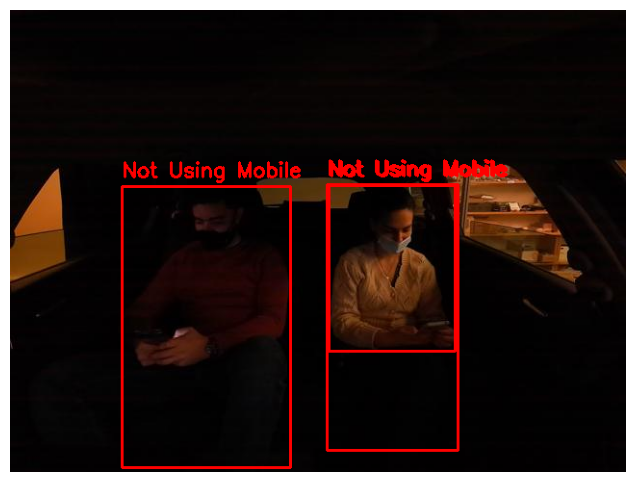

In [24]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the YOLOv8 model pretrained on COCO dataset
model = YOLO('yolov8n.pt')

def detect_mobile_use(image_path, confidence_threshold=0.1):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: could not read {image_path}")
        return None

    results = model(image)

    persons = []
    phones = []
    for r in results:
        boxes = r.boxes
        if boxes is not None:
            for box in boxes:
                class_id = int(box.cls)
                conf = float(box.conf)
                if conf >= confidence_threshold:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    if class_id == 0:  # person
                        persons.append((x1, y1, x2, y2))
                    elif class_id == 67:  # cell phone
                        phones.append((x1, y1, x2, y2))

    # Analyze proximity of phones to persons to infer phone usage
    def is_phone_near_person(person_box, phones):
        px1, py1, px2, py2 = person_box
        for phone_box in phones:
            x1, y1, x2, y2 = phone_box
            # Simple overlap or closeness check (can be refined)
            if (x2 > px1 and x1 < px2) and (y2 > py1 and y1 < py2):
                return True
        return False

    # Create a copy for drawing
    annotated_image = image.copy()
    mobile_users = 0
    person_count = 0

    for person_box in persons:
        person_count += 1
        near_mobile = is_phone_near_person(person_box, phones)
        x1, y1, x2, y2 = person_box
        color = (0, 255, 0) if near_mobile else (0, 0, 255)
        label = "Using Mobile" if near_mobile else "Not Using Mobile"
        if near_mobile:
            mobile_users += 1

        cv2.rectangle(annotated_image, (x1,y1), (x2,y2), color, 2)
        cv2.putText(annotated_image, label, (x1, y1-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

    print(f"Persons detected: {person_count}")
    print(f"Persons using mobile: {mobile_users}")

    # Display annotated image
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,6))
    plt.imshow(annotated_image_rgb)
    plt.axis('off')
    plt.show()

# Example: Update with your image path
image_path = '/content/drive/MyDrive/DATASET - PROJECT1/using_mobile/1.jpg'
detect_mobile_use(image_path)
